<img align="center" src="figures/course.png" width="800">

#                                    16720 (B) Neural Networks for Recognition - Assignment 3

     Instructor: Kris Kitani                       TAs: Arka, Jinkun, Rawal, Rohan, Sheng-Yu

## Q6 Data Augmentation [Extra Credit](20 points)

**Note: We would recommend finishing Question 4 (pytorch) before attempting this question**

**Please include all the write up answers below to the PDF submission. For the questions that need code, you need to include the screenshot of code to the PDF submission to get points.**

Data augmentation is a technique often used to boost the performance of neural networks on visual learning tasks such as classification. The method relies on applying transforms to input examples that change the input, but not enough to change the class label. In this problem, we will use the NIST36 dataset to evaluate the improvement we can get from augmentation quantitatively.

The augmentations you will implement will look something like 

![](figures/sample_aug1.png)
![](figures/sample_aug2.png)

### Q6.1 Implementing Data Transformations (10 pts, code + write-up)

In [66]:
import numpy as np
import cv2
import scipy.io
from scipy import ndimage
from ipynb.fs.defs.q1 import *

#### Q6.1.1 Implement Data Translation (3 pts, code)

First, you will implement a method to apply a translation to an image given an amount to translate in each direction. You are free to implement this however you like. The translated image should be the same size as the original, and the gaps induced by the translation should be filled with the appropriate values.  

<font color="red">**For this question, please also submit screenshot of your code snippets to the write-up**</font>

In [67]:
def apply_random_translation(im, dx, dy):
    '''
    Applies a random translation to the image, described by dx, and dy.
    
    [input]
    * im -- image to be translation
    * dx -- the number of pixels the image should be translated in the x direction
    * dy -- the number of pixesl the image should be translated in the y direction
    [output]
    * im -- the translated image
    '''
    from skimage import transform

    H = np.eye(3)
    H[0,2] = dx
    H[1,2] = dy
    #im_translated = transform.warp(im, np.linalg.inv(H), cval=1)
    im_translated = transform.warp(im, np.linalg.inv(H), mode="edge")

    return im_translated

#### Q6.1.2 Implement Data Rotation (2 pts, code)

Next, you will implement a method to apply rotation to an image. You are allowed to use library methods for this, we suggest using scipy.ndimage.rotate. However, you will need to ensure that the output of your method is a reasonable looking image - to do this, you will need to fill in any gaps induced by the rotation.

<font color="red">**For this question, please also submit screenshot of your code snippets to the write-up**</font>

In [68]:
def apply_random_rotation(im, angle):
    '''
    Applies a random rotation to the image of angle degrees.
    
    [input]
    * im -- image to be rotation
    * angle -- the number of degrees for the image to be rotated.
    
    [output]
    * im -- rotated image.
    '''
    from skimage import transform
    import math

    H = np.eye(3)
    angle = angle * math.pi/180
    alpha = np.cos(angle)
    beta = np.sin(angle)
    H[0,0] = alpha
    H[1,0] = -beta
    H[0,1] = beta
    H[1,1] = alpha
    H[0, 2] = (1 - alpha) * im.shape[1]//2 - beta * im.shape[0]//2
    H[1, 2] = beta * im.shape[1]//2 + (1 - alpha) * im.shape[0]//2

    #rotated_im = transform.warp(im, np.linalg.inv(H), cval = 1)
    rotated_im = transform.warp(im, np.linalg.inv(H), mode="edge")

    return rotated_im

#### Q6.1.3 Visualize transformations (5 pts, write-up)

Visualize 5 different data examples, with randomly selected values for dx, dy and angle. Be sure to label each image with the associated augmentation parameters, and visualize all 5 images on the same plot.

<font color="red">**Please include your answer to HW3:PDF**</font>

<font color="red">**For this question, please also submit screenshot of your code snippets to the write-up**</font>

Image Number: 5037
Image Number: 3211
Image Number: 3914
Image Number: 4888
Image Number: 4679


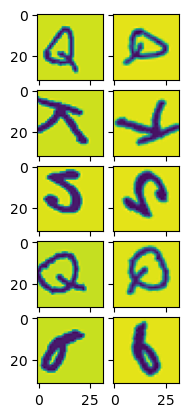

In [69]:
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

train_data = scipy.io.loadmat('data/nist36_train.mat')
valid_data = scipy.io.loadmat('data/nist36_valid.mat')

train_x, train_y = train_data['train_data'], train_data['train_labels']
valid_x, valid_y = valid_data['valid_data'], valid_data['valid_labels']

fig = plt.figure()
grid = ImageGrid(fig, 111, (5, 2), axes_pad = 0.1)

for i in range(0,10, 2):
    rand_image   = np.random.randint(0, train_x.shape[0])
    random_angle = np.random.randint(0, 360)
    random_t_x   = np.random.randint(-1, 1) * 4
    random_t_y   = np.random.randint(-1, 1) * 4
    print(f"Image Number: {rand_image}")
    sample = train_x[rand_image].reshape(32,32)
    grid[i].imshow(apply_random_translation(sample, random_t_x, random_t_y))
    grid[i+1].imshow(apply_random_rotation(sample, random_angle))

### Q6.2 Implementing Data Transformations (10 pts, code + write-up)

Next, you will use your transformations to modify examples in the training loop. Integrate your code for the data augmentations into the training loop such that each example received by the model has a random translation and rotation applied to it. Be sure to set the ranges for the parameters such that the augmentations keep the examples reasonable-looking. Train a model with your augmentations, and plot the accuracy vs. epochs compared to a model trained with no augmentations. (You can do this by setting the range of augmentation parameters to 0). What do you notice about the performance of the model with augmentations vs. without? Explain any notable differences you find. 

You may use any size neural network you choose, but make sure you use the same size network for evaluating the baseline performance (no augmentations) vs the performance with augmentation.

<font color="red">**Please include your answer to HW3:PDF**</font>

<font color="red">**For this question, please also submit screenshot of your code snippets to the write-up**</font>

Epoch: 0, Accuracy: 0.03740740740740739
Epoch: 1, Accuracy: 0.07620370370370369
Epoch: 2, Accuracy: 0.12564814814814812
Epoch: 3, Accuracy: 0.1647222222222222
Epoch: 4, Accuracy: 0.17435185185185187
Epoch: 5, Accuracy: 0.17972222222222223
Epoch: 6, Accuracy: 0.19287037037037028
Epoch: 7, Accuracy: 0.1973148148148148
Epoch: 8, Accuracy: 0.2110185185185185
Epoch: 9, Accuracy: 0.22138888888888877
Epoch: 10, Accuracy: 0.2264814814814814
Epoch: 11, Accuracy: 0.22981481481481472
Epoch: 12, Accuracy: 0.23287037037037037
Epoch: 13, Accuracy: 0.23333333333333323
Epoch: 14, Accuracy: 0.23962962962962958
Epoch: 15, Accuracy: 0.24305555555555544
Epoch: 16, Accuracy: 0.2510185185185185
Epoch: 17, Accuracy: 0.2529629629629628
Epoch: 18, Accuracy: 0.2588888888888888
Epoch: 19, Accuracy: 0.25166666666666665
Epoch: 20, Accuracy: 0.2586111111111111
Epoch: 21, Accuracy: 0.266574074074074
Epoch: 22, Accuracy: 0.27
Epoch: 23, Accuracy: 0.2687962962962962
Epoch: 24, Accuracy: 0.27249999999999985
Epoch: 25, 

Text(0, 0.5, 'Accuracy')

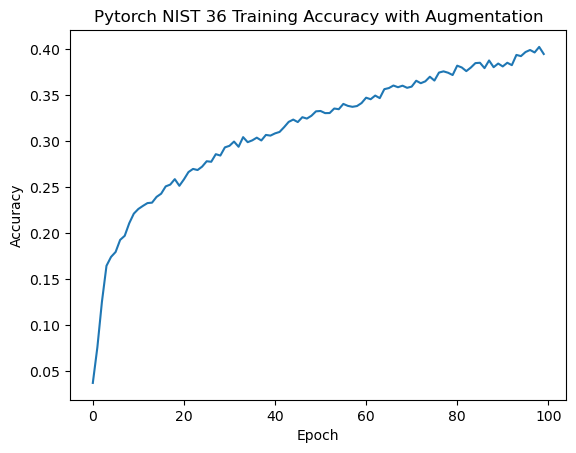

In [71]:
"""
This should look like your previous training loops.
"""

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.optim import Adam
import scipy
import numpy as np
import ipynb
import nbimporter
from matplotlib import pyplot as plt
from q1 import compute_loss_and_acc

def perturbe_img(imgs, max_t = 3.0, max_r = 30):
    out = torch.zeros(imgs.shape)
    for i, img in enumerate(imgs):
        try:
            random_angle = np.random.randint(-max_r, max_r)
            random_t_x   = np.random.randint(-1, 1) * max_t
            random_t_y   = np.random.randint(-1, 1) * max_t
        except:
            random_angle =0
            random_t_x   = 0
            random_t_y   = 0
        sample = img.reshape(32,32)
        sample = apply_random_rotation(sample, random_angle)
        sample = apply_random_translation(sample, random_t_x, random_t_y)
        out[i] = torch.from_numpy(sample.flatten())
    return out
    
# Import training data
train_data = scipy.io.loadmat('data/nist36_train.mat')
valid_data = scipy.io.loadmat('data/nist36_valid.mat')
train_x, train_y = train_data['train_data'], train_data['train_labels']
valid_x, valid_y = valid_data['valid_data'], valid_data['valid_labels']

# Format the data to be souped in by Pytorch
data = []
for i in range(train_x.shape[0]):
    data.append((train_x[i].astype(np.float32), train_y[i].astype(np.float32)))
train_loader = DataLoader(data, shuffle = True, batch_size=100)

hidden_layer_dim = 64
net = nn.Sequential(
        nn.Linear(train_x.shape[1], hidden_layer_dim),
        nn.Sigmoid(),
        nn.Linear(hidden_layer_dim, train_y.shape[1]),
        nn.Softmax()
    )

# Set the loss and the optimizers
criterion = nn.CrossEntropyLoss()
optimizer = Adam(net.parameters(), lr=1e-3)
epochs = 100

# Training
training_accs = []
val_accs      = []
val_losses    = []
for i in range(epochs):
    train_acc_epoch = 0
    for x, y in train_loader:
        # Rotate and translate the images
        x = perturbe_img(x.detach().numpy())
        
        y_hat = net.forward(x)
        _, train_acc = compute_loss_and_acc(y.detach().numpy(), y_hat.detach().numpy())
        train_acc_epoch += train_acc / len(train_loader) 
        loss  = criterion(y_hat, y)
        # training_losses.append(loss.detach())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Epoch: {i}, Accuracy: {train_acc_epoch}")
    training_accs.append(train_acc_epoch)

    # Validation Set
    y_hat_valid = net.forward(torch.from_numpy(valid_x.astype(np.float32)))
    val_loss, val_acc = compute_loss_and_acc(valid_y, y_hat_valid.detach().numpy())
    val_losses.append(val_loss)
    val_accs.append(val_acc)

print(f"Final Validation Accuracy: {val_acc}")

# Show training error
plt.plot(list(range(epochs)), training_accs)
plt.title("Pytorch NIST 36 Training Accuracy with Augmentation")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")